In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [4]:
filename = "/content/drive/MyDrive/Data CodingDojo/Wine_cultivars.csv"
df = pd.read_csv(filename)
df.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavonid phenols           178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [8]:
X = df.drop("Class label", axis=1)

y = df["Class label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
logreg = LogisticRegression()

In [12]:
scaler = StandardScaler()

In [13]:
logreg_pipe = make_pipeline(scaler, logreg)

In [14]:
logreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Resultado por defecto

In [15]:
print("Training Score:",logreg_pipe.score(X_train, y_train))
print("Test Score:", logreg_pipe.score(X_test, y_test))

Training Score: 1.0
Test Score: 0.9777777777777777


Regularizacion L1

{0.0001: 0.3333333333333333,
 0.001: 0.3333333333333333,
 0.01: 0.3333333333333333,
 0.1: 1.0,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

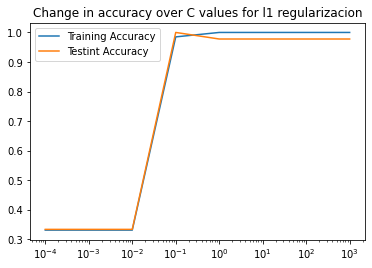

In [19]:
c_values = [0.0001,0.001,0.01,0.1,1,10,100,1000]
train_scores = []
test_scores = []

for c in c_values:
  log_reg = LogisticRegression(C=c, max_iter=1000, solver="liblinear", penalty="l1")
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
  # add the training and testint scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))


#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label="Training Accuracy")
ax.plot(c_values, test_scores, label="Testint Accuracy")
ax.set_xticks(c_values)
ax.set_title("Change in accuracy over C values for l1 regularizacion")
ax.legend()

#Set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale("log")
#print a dictionary of values of C and accuracy scores
{c: score for c, score in zip(c_values, test_scores)}

Regularizacion L2

{0.0001: 0.9111111111111111,
 0.001: 0.9333333333333333,
 0.01: 0.9555555555555556,
 0.1: 0.9777777777777777,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

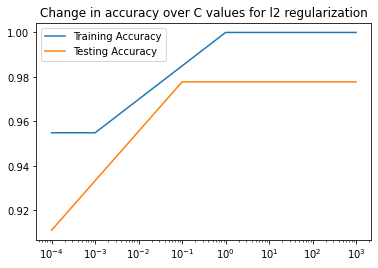

In [20]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

#2a. Modelo KNN

In [37]:
knn = KNeighborsClassifier(n_neighbors=6)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)
predicitons = knn_pipe.predict(X_test)
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.9777777777777777

In [41]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}

In [40]:
score_x = []
for x in range(1,10):
  knn_x = KNeighborsClassifier(n_neighbors=x) #n_neightbors=5 por defecto
  knn_x_pipe = make_pipeline(scaler,knn_x)
  knn_x_pipe.fit(X_train,y_train)
  predictions = knn_x_pipe.predict(X_test)
  acc_score_x = knn_x_pipe.score(X_test, y_test)
  score_x.append(acc_score_x)
score_x


[0.9555555555555556,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

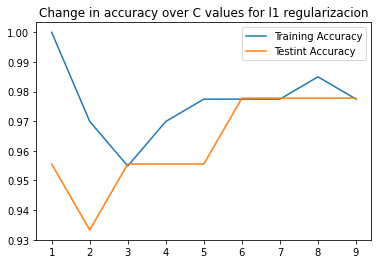

In [45]:
c_values = list(range(1,10))
train_scores = []
test_scores = []

for c in c_values:
  knn_x = KNeighborsClassifier(n_neighbors=c)
  knn_x_pipe = make_pipeline(scaler, knn_x)
  knn_x_pipe.fit(X_train, y_train)
  # add the training and testint scores to our scores lists
  train_scores.append(knn_x_pipe.score(X_train, y_train))
  test_scores.append(knn_x_pipe.score(X_test, y_test))


#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label="Training Accuracy")
ax.plot(c_values, test_scores, label="Testint Accuracy")
ax.set_xticks(c_values)
ax.set_title("Change in accuracy over C values for l1 regularizacion")
ax.legend()

#2b. Modelo Arbol

In [33]:
rf = RandomForestClassifier(random_state = 42, max_depth= 3)
rf.fit(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_test_score)

1.0


In [29]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [43]:
score_rf_x = []
for y in range(1,10):
  rf_x = RandomForestClassifier(max_depth=y) #n_neightbors=5 por defecto
  rf_x_pipe = make_pipeline(scaler,rf_x)
  rf_x_pipe.fit(X_train,y_train)
  predictions = rf_x_pipe.predict(X_test)
  acc_score_rf_x = rf_x_pipe.score(X_test, y_test)
  score_rf_x.append(acc_score_rf_x)
score_rf_x

[0.9333333333333333,
 0.9777777777777777,
 0.9777777777777777,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]


3. a  luego de ejecutar los modelos requeridos y sus respectivas optimizaciones.

se opta por el modelo de arbol pues da un resultado de 1 en el conjunto de prueba el cual es ideal.

## los hiperparametros vistos fueron:
1. modelo de regresion logistica
- L1 Y L2
2. modelo KNN
- n_neighbors
3. modelo arbol
- max_depth

